In [391]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import warnings
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
import ast

In [372]:
df = pd.read_csv('../BNB_nue data/test.csv', index_col=0)

In [373]:
df.head(634)

,isTrueTrack,pdg,completeness,purity,x,z,eps,pc2Var,nHits,RSS,RSS2
0,1,2212,1.000000,0.909091,"[119.384, 119.3, 119.172, 119.087, 119.007, 11...","[846.25, 846.55, 846.85, 847.15, 847.45, 847.7...",0.2,0.000057,41,0.010498,7.951052e-03
1,1,2212,0.733333,1.000000,"[115.512, 115.676, 115.968, 116.284, 116.596, ...","[842.35, 842.65, 842.95, 843.25, 843.55, 843.8...",0.5,0.000663,13,0.003382,2.149869e-03
2,0,11,0.892892,0.998911,"[165.12, 165.08, 165.017, 164.967, 164.921, 16...","[640.75, 641.05, 641.35, 641.65, 641.95, 642.2...",0.4,0.000467,247,47.848128,4.783315e+01
3,1,2212,0.989362,0.965398,"[165.52, 165.513, 165.514, 165.499, 165.503, 1...","[638.35, 638.65, 638.95, 639.25, 639.55, 639.8...",0.7,0.000035,136,1.331094,2.166647e-01
4,1,2212,0.875000,0.875000,"[164.341, 164.365, 164.386, 164.427, 164.472, ...","[632.05, 632.35, 632.65, 632.95, 633.25, 633.5...",0.1,0.001649,21,0.030436,8.956016e-03
5,0,11,0.643982,1.000000,"[139.881, 139.847, 139.79, 139.785, 139.783, 1...","[229.45, 229.75, 230.05, 230.35, 230.65, 230.9...",1.4,0.001040,317,795.388327,7.860608e+02
6,0,11,0.052306,1.000000,"[137.377, 137.368, 137.509, 137.707, 138.014, ...","[273.25, 273.55, 273.85, 274.15, 274.45, 274.7...",0.6,0.085523,37,9.915949,9.153291e+00
7,0,11,0.975904,0.852632,"[70.8057, 70.2276, 70.032, 36.6363, 35.3826, 3...","[85.15, 89.65, 90.55, 96.25, 96.25, 96.25, 96....",15.0,0.102708,73,2.661193,2.626162e+00
8,1,2212,0.993789,0.977597,"[206.366, 206.338, 206.139, 206.005, 205.845, ...","[958.45, 958.75, 959.05, 959.35, 959.65, 959.9...",1.8,0.000003,242,0.785120,5.335547e-01
9,0,11,0.960212,1.000000,"[207.13, 207.483, 207.878, 208.298, 208.682, 2...","[959.05, 959.35, 959.65, 959.95, 960.25, 960.5...",0.7,0.000079,38,0.011048,2.837137e-03


In [374]:
print(len(df))
df = df.dropna().reset_index()
print(len(df))



2034
2033


In [375]:
#df = df[df['nHits']>50].reset_index()
df = df[df['completeness']>0.7]
#df = df[df['nHits']>50]
df = df[df['purity']>0.7].reset_index()


In [376]:
columns = ['RSS', 'nHits', 'eps', 'RSS2', 'pc2Var']
X = df[columns]
y = df['isTrueTrack']
X = np.array(X)

In [377]:
splits = 2
kf = KFold(n_splits=splits)
kf.get_n_splits(X)
score = 0
acc_sc = 0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #clf = tree.DecisionTreeClassifier(max_depth=4)
    clf = XGBClassifier()

    clf = clf.fit(X_train, y_train )
    y_pred = clf.predict(X_test)
    #y_scores = clf.predict_proba(X_test)
    #sc = roc_auc_score(y_test, y_scores[:,1])
    #score+= sc
    acc_sc += accuracy_score(y_test, y_pred)
    #print(score)
#print(score/splits)
print(acc_sc/splits)
print(clf.feature_importances_)
print(confusion_matrix(y_test, y_pred))

0.894624545914
[ 0.09306569  0.20620438  0.26459855  0.15693431  0.27919707]
[[326  24]
 [ 39 270]]


In [378]:
index = test_index
test_df=df.loc[index]

test_df['id_pred']=y_pred

In [379]:
missed_df = test_df.loc[test_df['id_pred']!=test_df['isTrueTrack']]
missed_df.head()

,level_0,index,isTrueTrack,pdg,completeness,purity,x,z,eps,pc2Var,nHits,RSS,RSS2,id_pred
681,1056,1057,1,2212,0.975510,0.931774,"[39.7257, 39.774, 39.8807, 39.9968, 40.1578, 4...","[258.85, 259.15, 259.45, 259.75, 260.05, 260.3...",0.6,0.000182,153,8.900190,2.009945,0
692,1068,1069,0,22,0.835165,1.000000,"[48.3964, 49.6329, 48.7653, 49.6568, 50.5483, ...","[18.25, 18.25, 18.55, 18.55, 18.55, 18.55, 18....",0.9,0.072976,19,0.301450,0.063476,1
701,1084,1085,1,-211,0.782759,0.879845,"[252.023, 252.004, 251.983, 217.685, 217.694, ...","[98.35, 98.65, 98.95, 106.15, 106.45, 113.35, ...",30.9,0.001761,87,35.772113,19.494657,0
724,1120,1121,1,-211,1.000000,0.997207,"[184.56, 184.638, 184.357, 185.692, 183.784, 1...","[545.95, 546.25, 546.55, 546.55, 546.85, 546.8...",1.5,0.019746,103,3.612974,0.788899,0
741,1141,1142,1,211,0.841270,0.976959,"[184.563, 184.492, 184.499, 184.477, 184.455, ...","[202.15, 202.45, 202.75, 203.05, 203.35, 203.6...",0.9,0.024353,106,6.645782,2.686474,0


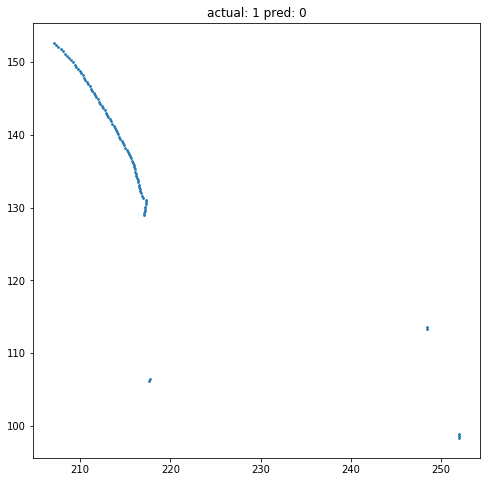

In [396]:
i=701
plt.figure(figsize=(8,8))
plt.title('actual: ' + str(missed_df.isTrueTrack[i]) +  ' pred: ' + str(missed_df['id_pred'][i]))
plt.scatter(ast.literal_eval(missed_df.x[i]), ast.literal_eval(missed_df.z[i]), s=3)
plt.show()